### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [143]:
la=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
la.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [144]:
la.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [145]:
la.shape

(614, 13)

In [146]:
la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [147]:
la.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [148]:
la.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

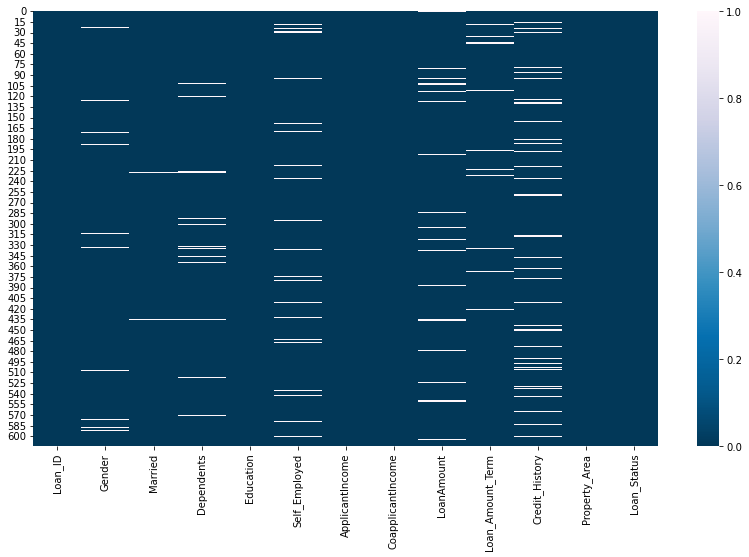

In [149]:
plt.figure(figsize=[14,8])
sns.heatmap(la.isnull(),cmap='PuBu_r')
plt.show()

### Observation-1

In the above dataset :

1) The size of table is 614*13 i.e. no. of rows are 641 and no. of columns are 13(including target).

2) Out of 12 columns 5 columns are continuous in nature and rest 8 are object type.

3) Null values are present in the Gender, married, dependents, self_employed, loan_amount, loan_amount_term and credit_history columns, so there is need to adopt imputation technique.

4) In case of object data type, we will apply the encoding technique on those columns which are contributing to make prediction and those column which are not important for our model will be dropped.

## EDA :
##### Exploratory data analysis

unique-- ['Male' 'Female' nan]


Male      489
Female    112
Name: Gender, dtype: int64


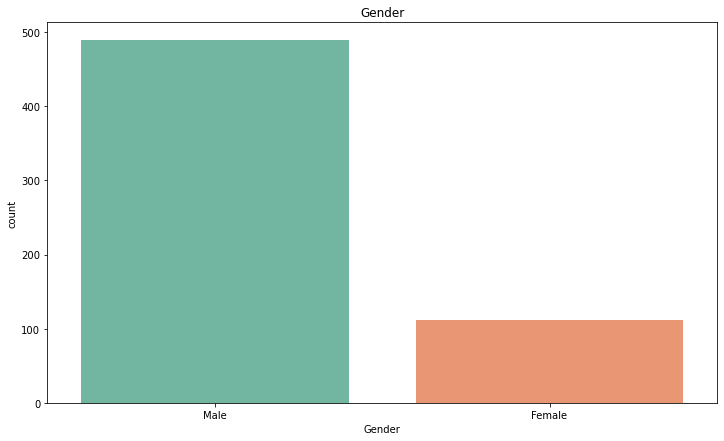

In [150]:
print('unique--',la['Gender'].unique())
print('\n')
print(la['Gender'].value_counts())
plt.figure(figsize=[12,7])
sns.countplot(la['Gender'],palette='Set2')
plt.title('Gender')
plt.show()

unique-- ['Y' 'N']


Y    422
N    192
Name: Loan_Status, dtype: int64


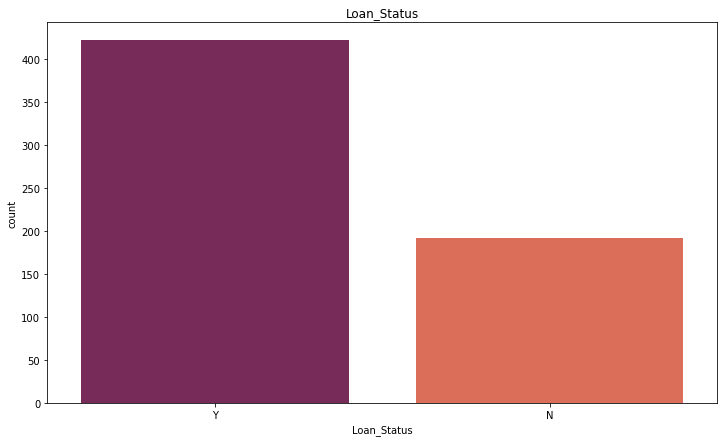

In [151]:
print('unique--',la['Loan_Status'].unique())
print('\n')
print(la['Loan_Status'].value_counts())
plt.figure(figsize=[12,7])
sns.countplot(la['Loan_Status'],palette='rocket')
plt.title('Loan_Status')
plt.show()

unique-- ['No' 'Yes' nan]


Yes    398
No     213
Name: Married, dtype: int64


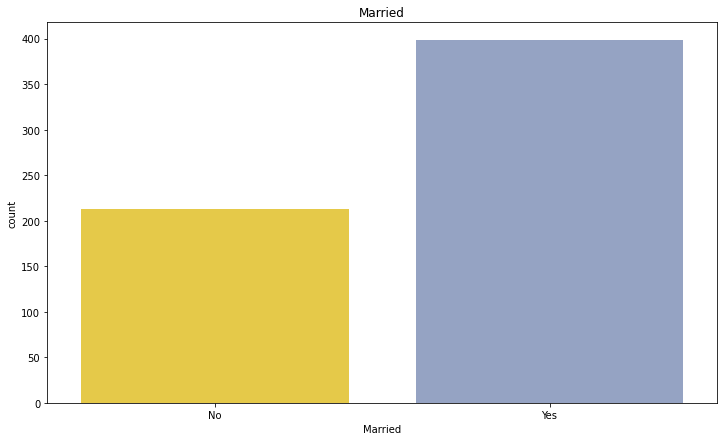

In [152]:
print('unique--',la['Married'].unique())
print('\n')
print(la['Married'].value_counts())
plt.figure(figsize=[12,7])
sns.countplot(la['Married'],palette='Set2_r')
plt.title('Married')
plt.show()

unique-- ['0' '1' '2' '3+' nan]


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


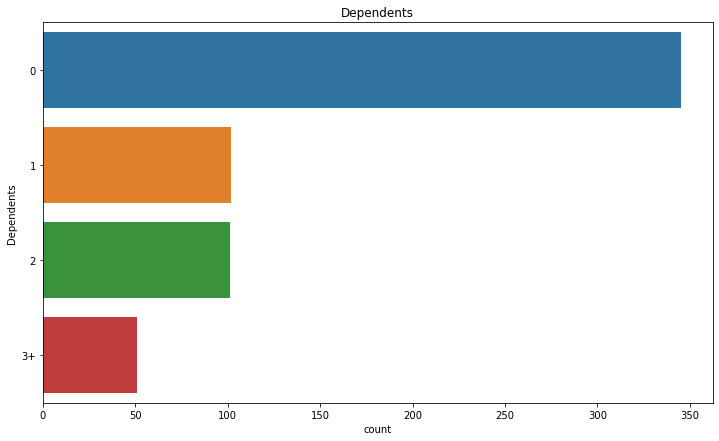

In [153]:
print('unique--',la['Dependents'].unique())
print('\n')
print(la['Dependents'].value_counts())
plt.figure(figsize=[12,7])
sns.countplot(y=la['Dependents'])
plt.title('Dependents')
plt.show()

unique-- ['Graduate' 'Not Graduate']


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Text(0.5, 1.0, 'Education')

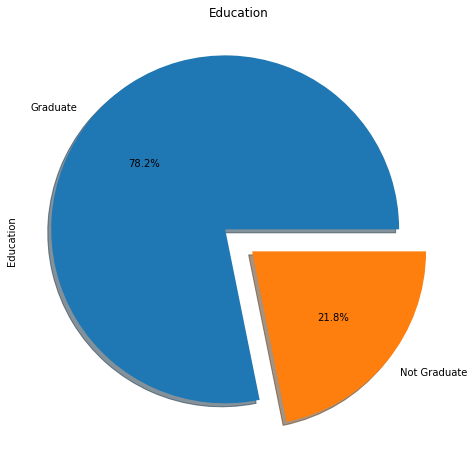

In [154]:
print('unique--',la['Education'].unique())
print('\n')
print(la['Education'].value_counts())
la.Education.value_counts().plot.pie(explode=[0.1,0.1],shadow=True,figsize=(8,8),autopct='%1.1f%%')
plt.title('Education')

unique-- ['No' 'Yes' nan]


No     500
Yes     82
Name: Self_Employed, dtype: int64


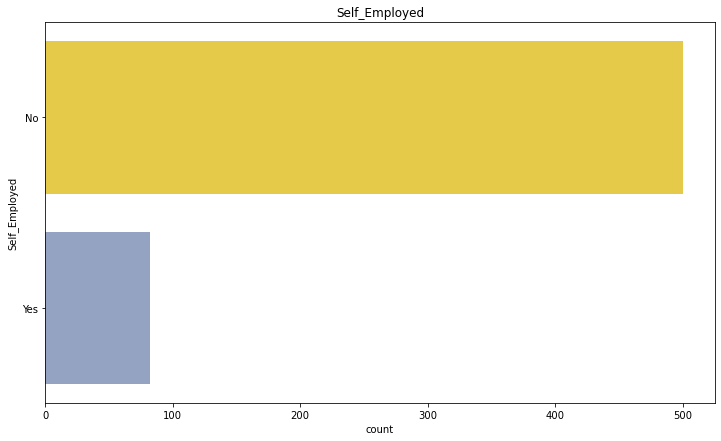

In [155]:
print('unique--',la['Self_Employed'].unique())
print('\n')
print(la['Self_Employed'].value_counts())
plt.figure(figsize=[12,7])
sns.countplot(y=la['Self_Employed'],palette='Set2_r')
plt.title('Self_Employed')
plt.show()

unique-- ['Urban' 'Rural' 'Semiurban']


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Text(0.5, 1.0, 'Property_Area')

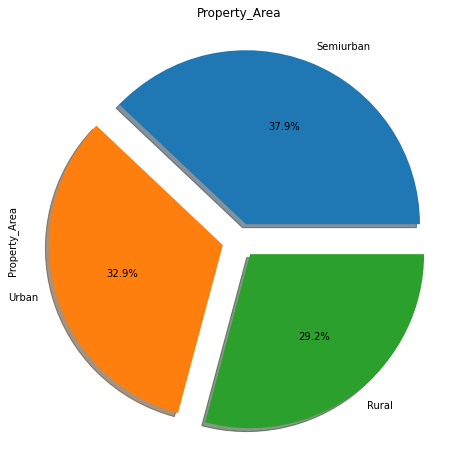

In [156]:
print('unique--',la['Property_Area'].unique())
print('\n')
print(la['Property_Area'].value_counts())
la.Property_Area.value_counts().plot.pie(explode=[0.1,0.1,0.1],shadow=True,figsize=(8,8),autopct='%1.1f%%')
plt.title('Property_Area')

### Observation-2

From the above results we can conclude that:
    
1) Most of the applicants who has applied for loan are male, In other way we can say that male(489) has applied for loan more than female(112)

2) Married people has applied for loan more than unmarried people, In numbers it is 398(married) and 213(unmarried) resp.

3) When bank give loan to the people, at that time they check how many person dependent on applicant.So in our data one dependents columns are present which will help to make final decison whether a person will get loan or not.

There are very less people who have 3 or more than 3 dependents around 51.
101 applicants have 2 dependents only.
102 applicants have 1 dependents only.
345 applicants are there who has no dependents.

4) Most of the applicants who has applied for loan are graduate in numbers it is around 480(78.2%) and very less not graduate  people are there who has applied for loan in number it is around 134(21.8%).

5) People who are not self_employes(500) has applied for loan more then self_employed people(82).

6) Most of the applicants are belongs to semiurban area(233) and urban area(202).comparatively less people are there who belongs to rural area who applied for loan(179).

.

### Dropping Column

We are dropping load_id column because this column will not help us to predict the target column.

In [157]:
la.drop(['Loan_ID'],axis=1,inplace=True)

### Imputation technique 

In [158]:
from sklearn.impute import SimpleImputer

In [159]:
imp=SimpleImputer(strategy='most_frequent')

In [160]:
null_column=['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

for i in null_column:
    la[i]=imp.fit_transform(la[i].values.reshape(-1,1))
  

In [161]:
la.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Encoding technique 

In [162]:
from sklearn.preprocessing import LabelEncoder

In [163]:
le=LabelEncoder()

In [164]:
encd_col=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

for i in encd_col:
    la[i]=le.fit_transform(la[i])

In [165]:
la.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

## Checking Outliers

In [166]:
la.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Gender                  AxesSubplot(0.125,0.657941;0.168478x0.222059)
Married              AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Dependents           AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Education            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Self_Employed           AxesSubplot(0.125,0.391471;0.168478x0.222059)
ApplicantIncome      AxesSubplot(0.327174,0.391471;0.168478x0.222059)
CoapplicantIncome    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
LoanAmount           AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Loan_Amount_Term           AxesSubplot(0.125,0.125;0.168478x0.222059)
Credit_History          AxesSubplot(0.327174,0.125;0.168478x0.222059)
Property_Area           AxesSubplot(0.529348,0.125;0.168478x0.222059)
Loan_Status             AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

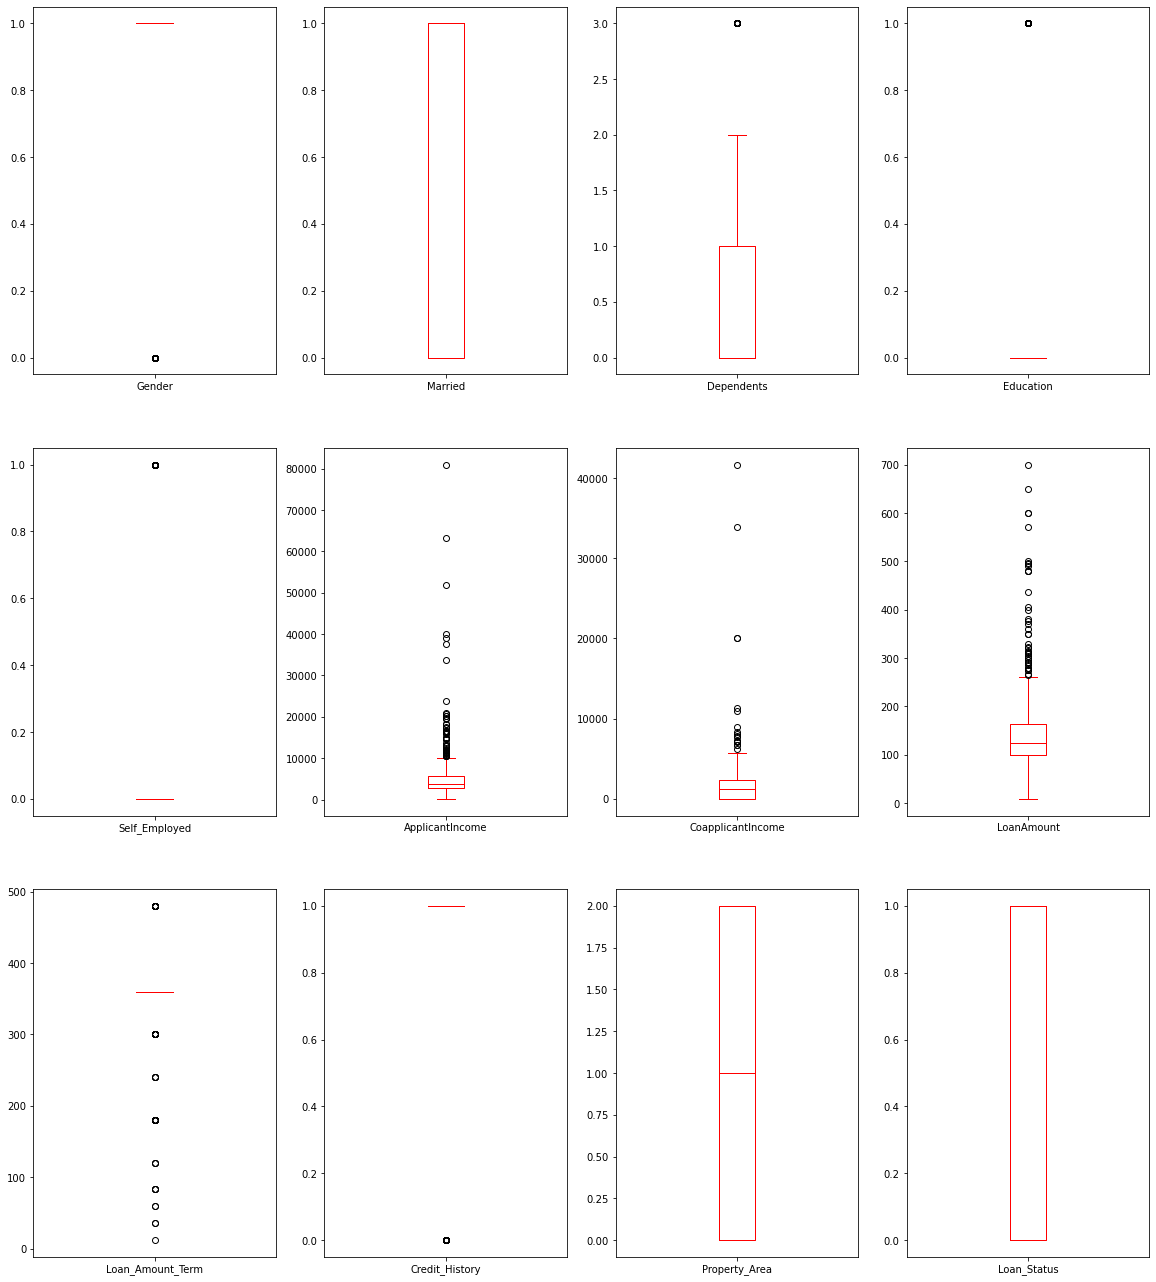

In [167]:
la.plot(kind='box',subplots=True,layout=(3,4),figsize=[20,23],color='r')

### Observation-3

From the above results we can say that some outliers are present in our data set:

1) As we can see that in the applicant_income column outliers are present because the diffrence between mean(5403) and maximum(81000) values is very high and also the standard deviation is very high, which shows the data are highly spreded in this column.

2) In the Coapplicant_Income column some outliers are present because the diffrence between mean(1621) and maximum(41667) values is very big and also the standard deviation(2926) is very large which shows that tha data are very far away from the mean.

3) Similarly in the loan amount column and loan amount term columns outliers are present.

## Checking Skewness

In [168]:
from scipy.stats import skew

In [169]:
la.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Gender
-1.644764550585881


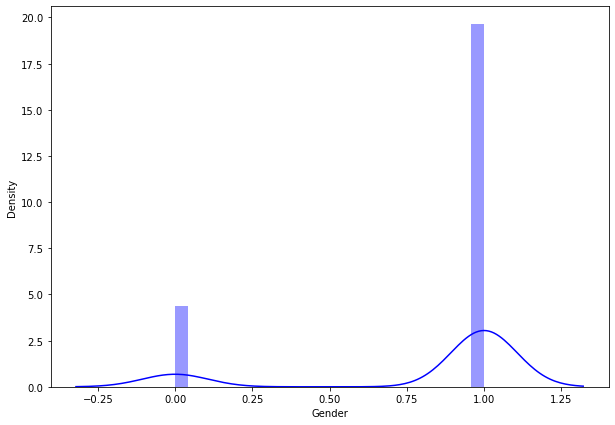

Married
-0.6432737969221631


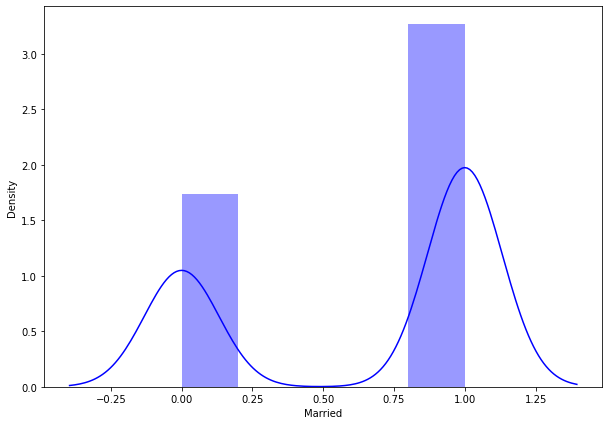

Dependents
1.0130683122414248


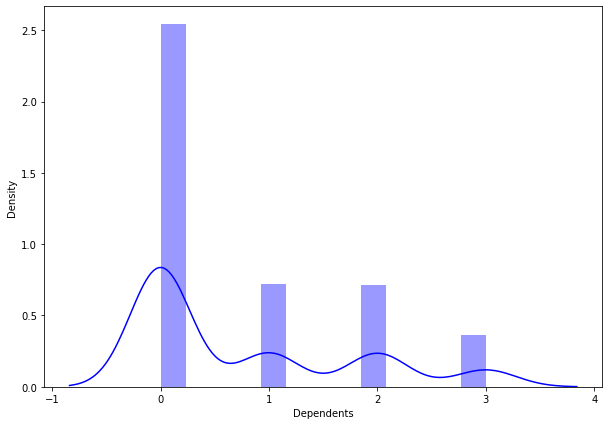

Education
1.3642786441579564


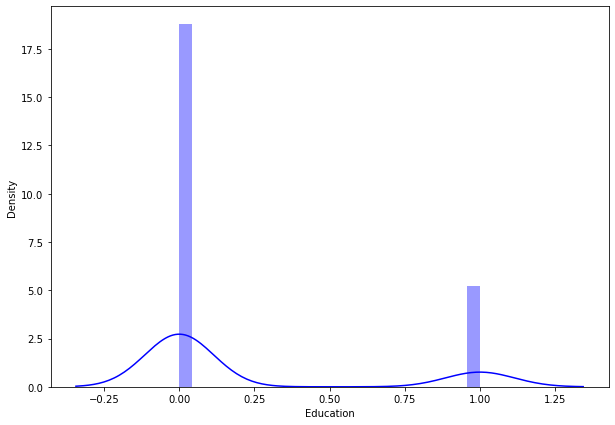

Self_Employed
2.1545162372084


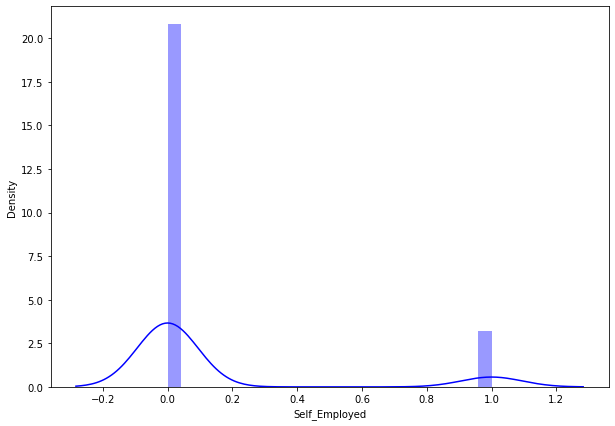

ApplicantIncome
6.523526250899361


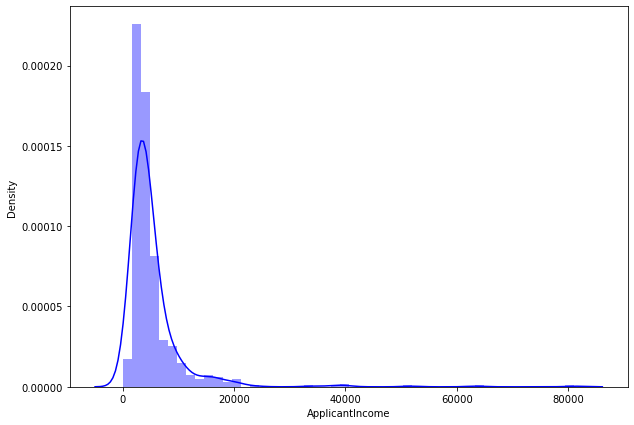

CoapplicantIncome
7.473216996340462


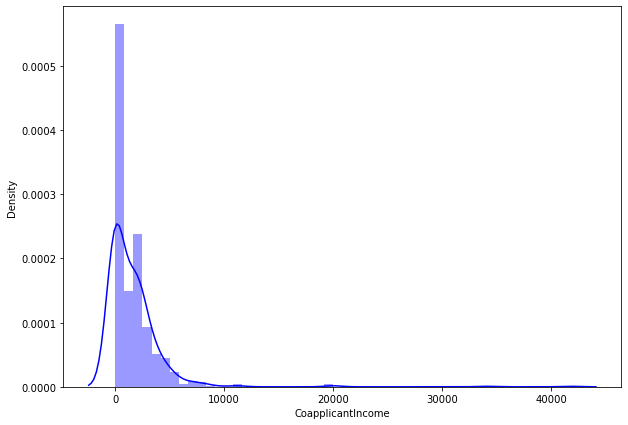

LoanAmount
2.73869518774095


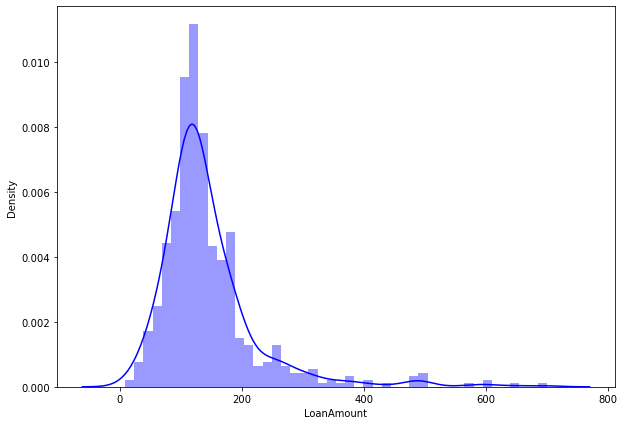

Loan_Amount_Term
-2.396239917101247


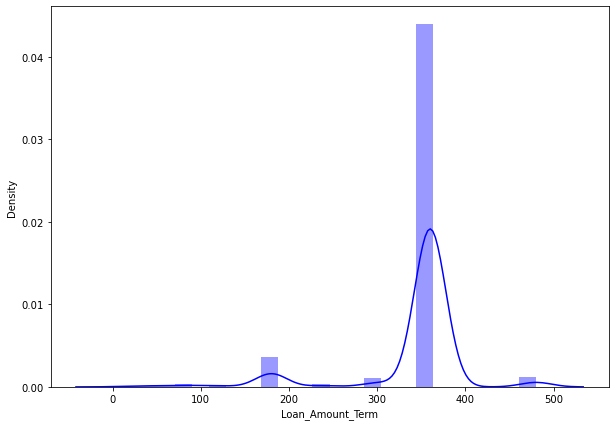

Credit_History
-2.0170275689782207


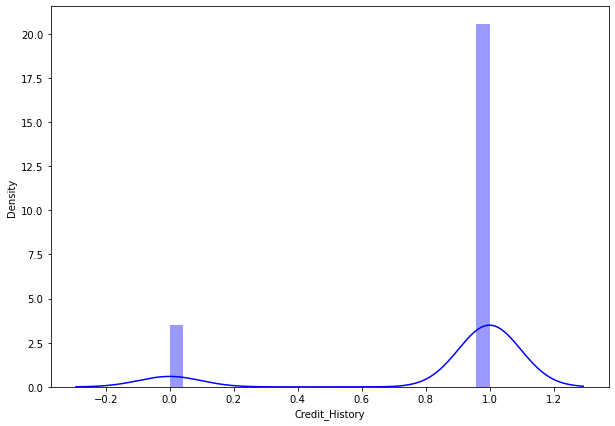

Property_Area
-0.06603431807343829


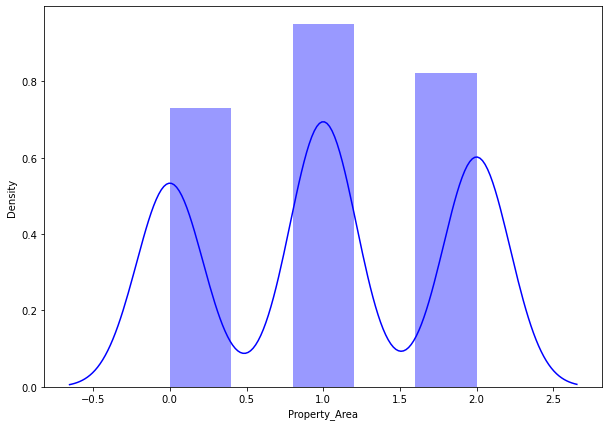

Loan_Status
-0.8080179267715549


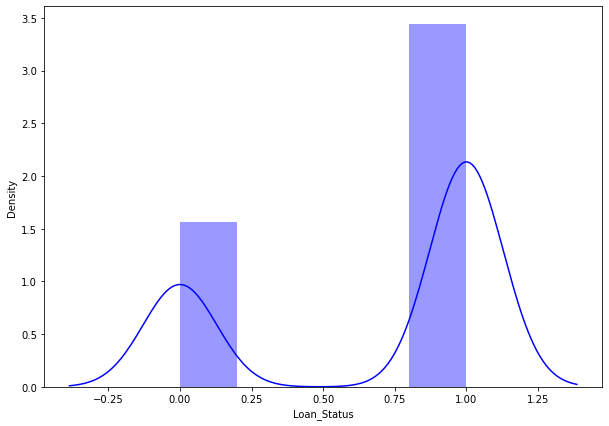

In [170]:
for i in la:
    print(i)
    print(skew(la[i]))
    
    plt.figure(figsize=(10,7))
    sns.distplot(la[i],color='b')
    plt.show()

### Observation-4

From the above results we can conclude that 


1. In the Property_Area, columns skewness is not present i.e. data are normally distributed in these column.


2. Coapplicant Income(7.49) and Applicant Income(6.53) columns have highest skewness as compare to other columns.


3. Dependents(1.01), Education(1.36), Self_Employed(2.15) and LoanAmount(2.74) colums has high skewness.


4. Gender(-1.64), Loan_Amount_Term(-2.40), Credit_History(-2.02) and 4046(8.64) colums are not equally distributed and have skewed data.

## Checking correlation

In [171]:
la.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.031808
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

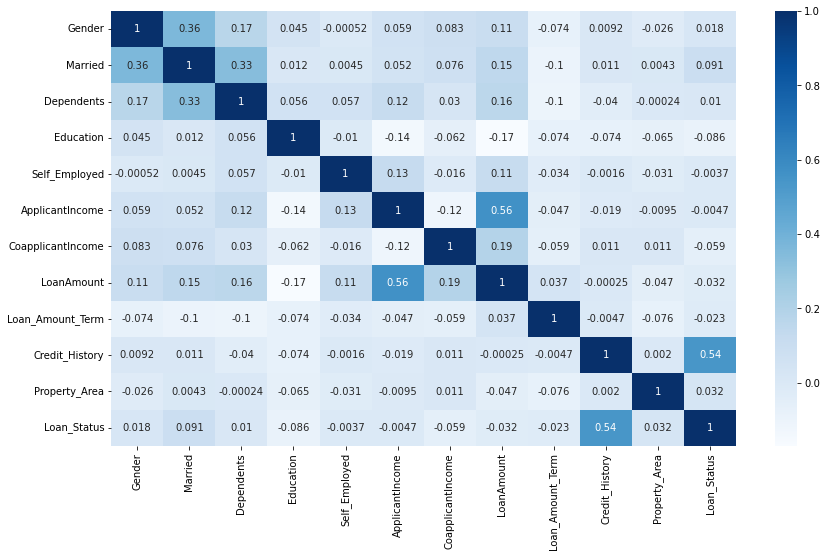

In [172]:
plt.figure(figsize=[14,8])
sns.heatmap(la.corr(),cmap='Blues',annot=True)
plt.show()

<AxesSubplot:>

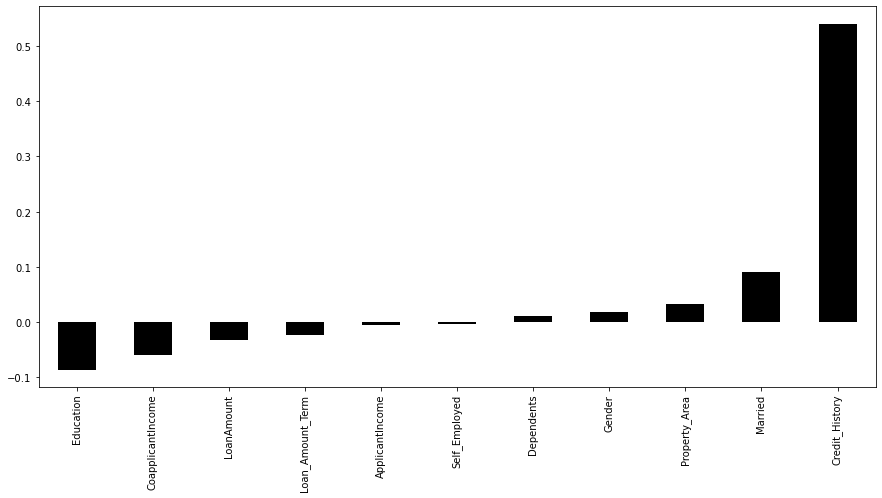

In [173]:
plt.figure(figsize=[15,7])
la.corr()['Loan_Status'].sort_values().drop(['Loan_Status']).plot(kind='bar',color='black')

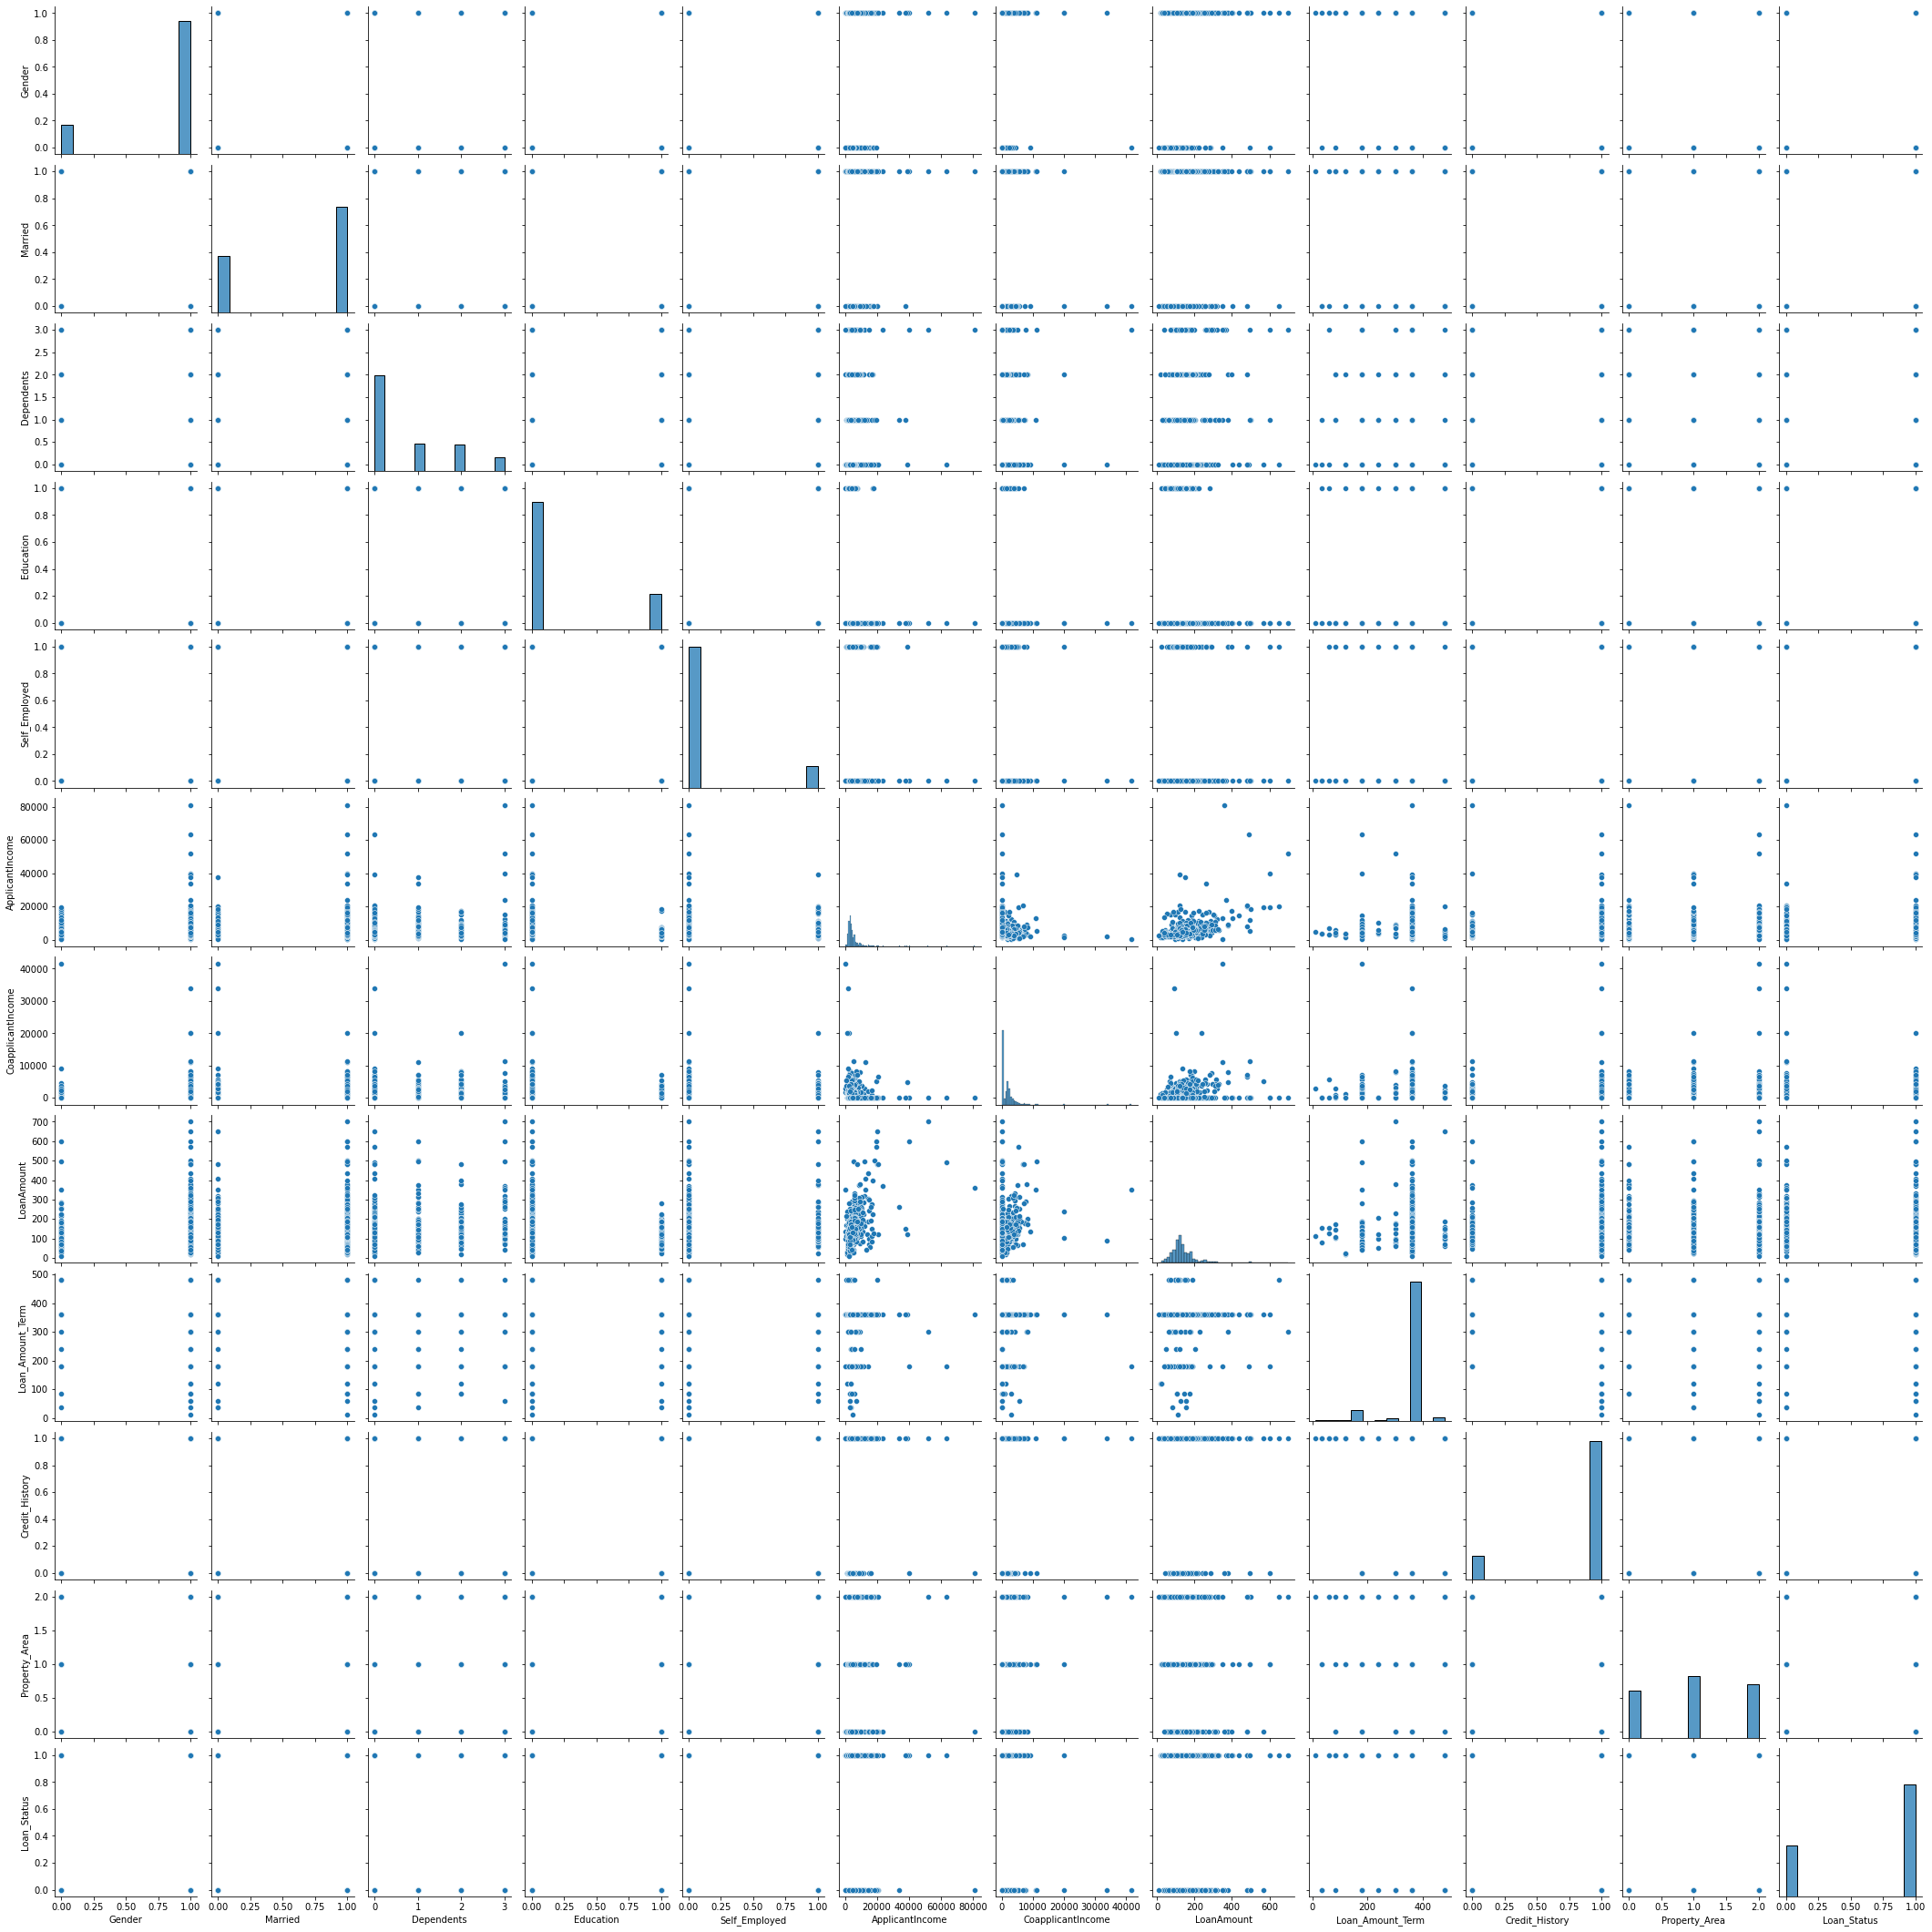

In [226]:
sns.pairplot(la)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='Gender'>

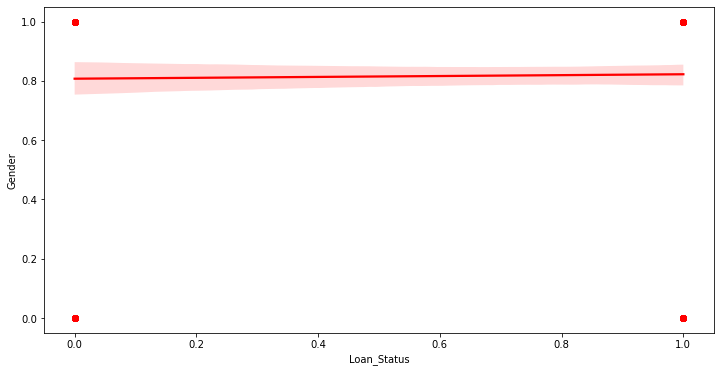

In [227]:
plt.figure(figsize=[12,6])    
sns.regplot(data=la,x='Loan_Status',y='Gender',color='r')

<AxesSubplot:xlabel='Loan_Status', ylabel='Dependents'>

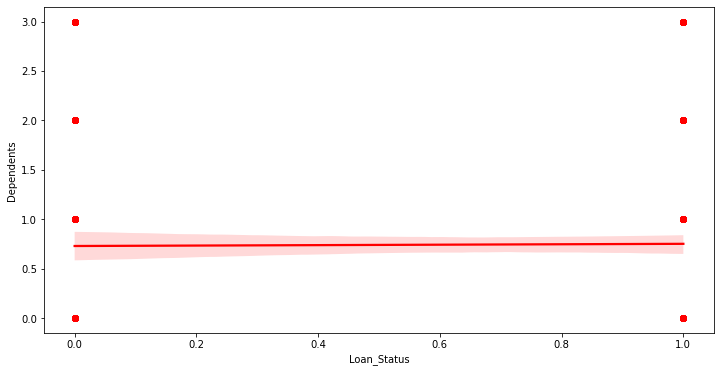

In [175]:
plt.figure(figsize=[12,6])    
sns.regplot(data=la,x='Loan_Status',y='Dependents',color='r')

<AxesSubplot:xlabel='Loan_Status', ylabel='Self_Employed'>

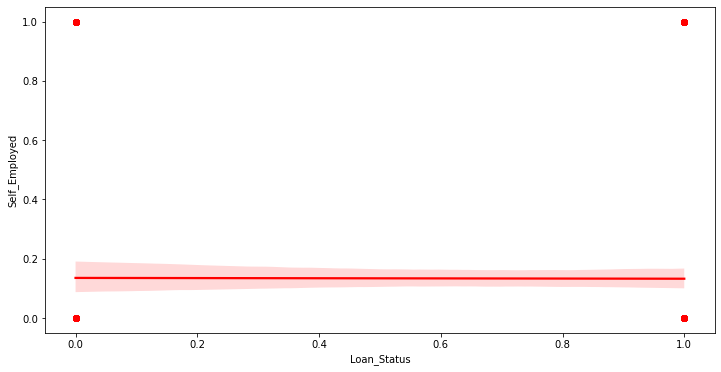

In [176]:
plt.figure(figsize=[12,6])    
sns.regplot(data=la,x='Loan_Status',y='Self_Employed',color='r')

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

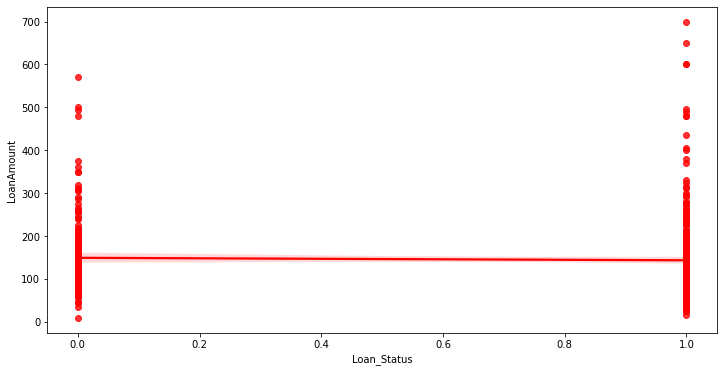

In [177]:
plt.figure(figsize=[12,6])    
sns.regplot(data=la,x='Loan_Status',y='LoanAmount',color='r')

<AxesSubplot:xlabel='Loan_Status', ylabel='Property_Area'>

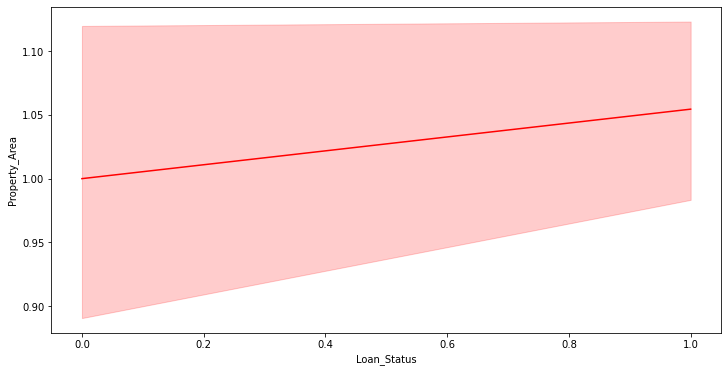

In [178]:
plt.figure(figsize=[12,6])    
sns.lineplot(data=la,x='Loan_Status',y='Property_Area',color='r')

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

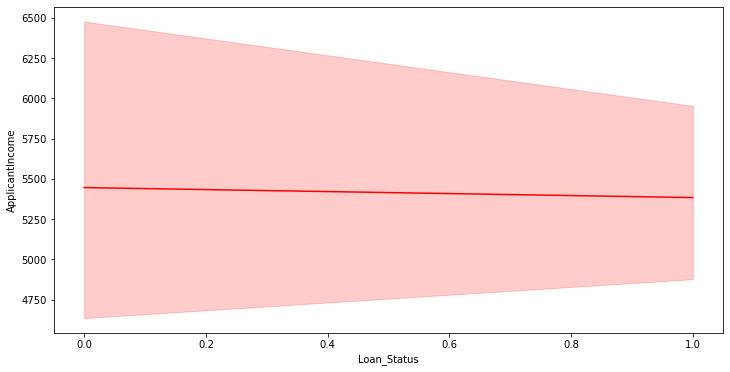

In [179]:
plt.figure(figsize=[12,6])    
sns.lineplot(data=la,x='Loan_Status',y='ApplicantIncome',color='r')

### Observation-5

From the above results we got some conclusion:

1) 1) Credit hostory, married, gender and property area columns have positive correlation with target column.

2) Education, loan_amount_ loan_amount_term and co-applicant_income have negative correlation with taget column.

3) Credit history column is making a good(54%) corelation with target column, which can be considered as a good bond. 

4) If we focus on the seaborn heatmap, We will find that every column(excluding target) is making around zero correlation with target column.

.

# Data Preprocessing 

In [180]:
x=la.iloc[:,0:-1]
y=la.iloc[:,-1]

In [181]:
x.shape

(614, 11)

In [182]:
y.shape

(614,)

## Removing Outliers

In [183]:
from scipy.stats import zscore

In [184]:
z=np.abs(zscore(x))
z.shape

(614, 11)

In [185]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [186]:
x=x[(z<3).all(axis=1)]

In [187]:
y=y[(z<3).all(axis=1)]

In [188]:
x.shape

(577, 11)

In [189]:
y.shape

(577,)

In [190]:
Data_loss=((614-577)/614)*100
print('Data_loss',Data_loss)

Data_loss 6.026058631921824


In [191]:
col=x.columns

### We removed outliers and lost our 6.02% data which is less then 10%. So we can say that this percentage loss is under our maximum range and negligible.

## Removing Skewness

In [192]:
from sklearn.preprocessing import power_transform

In [193]:
x.skew()           # before removing skewness

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [194]:
x=power_transform(x,method='yeo-johnson')

In [195]:
x=pd.DataFrame(x,columns=col)

In [200]:
x.skew()           # after removing skewness

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047768
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.155094
dtype: float64

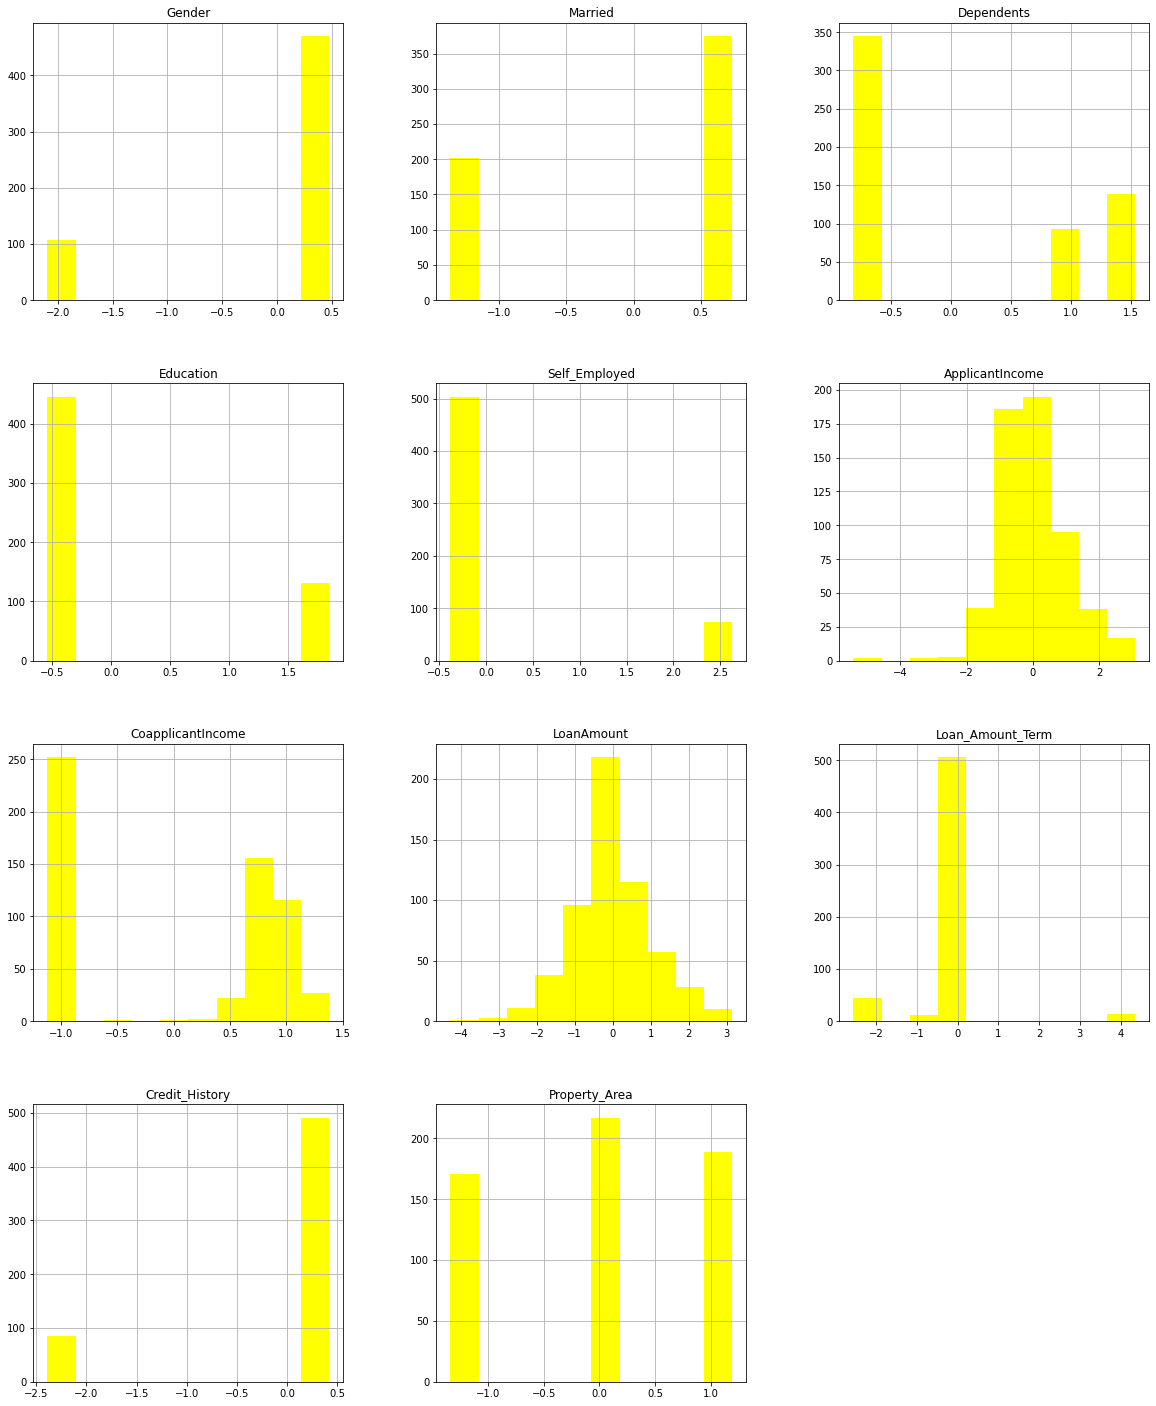

In [203]:
x.hist(figsize=(20,25),color='yellow')
plt.show()

## Data Scaling 

In [205]:
from sklearn.preprocessing import StandardScaler

In [207]:
ss=StandardScaler()

In [208]:
x=ss.fit_transform(x)

In [210]:
x=pd.DataFrame(x,columns=col)

## VIF
### Variance inflation factor

In [212]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [213]:
def vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [214]:
vif(x)

,Variables,VIF Factor
0,Gender,1.219133
1,Married,1.432859
2,Dependents,1.184840
3,Education,1.065531
4,Self_Employed,1.055651
5,ApplicantIncome,1.761276
6,CoapplicantIncome,1.583743
7,LoanAmount,1.549234
8,Loan_Amount_Term,1.048397
9,Credit_History,1.008631


.

#### We will not remove any column because vif factor is not showing high values.

## Adopting SMOTE technique for data balancing

In [218]:
from imblearn.over_sampling import SMOTE

In [219]:
sm=SMOTE()

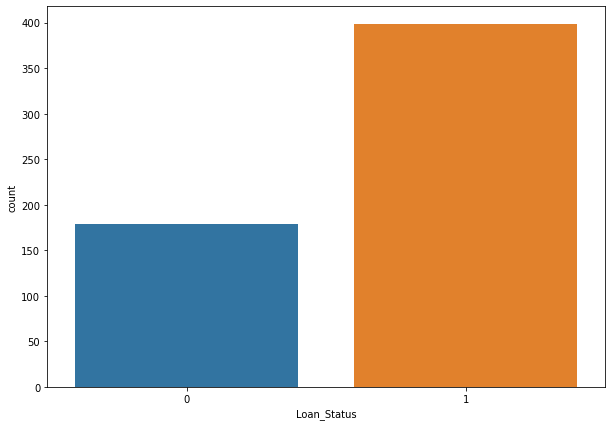

In [220]:
plt.figure(figsize=[10,7])
sns.countplot(y)
plt.show()

In [222]:
x,y=sm.fit_resample(x,y)

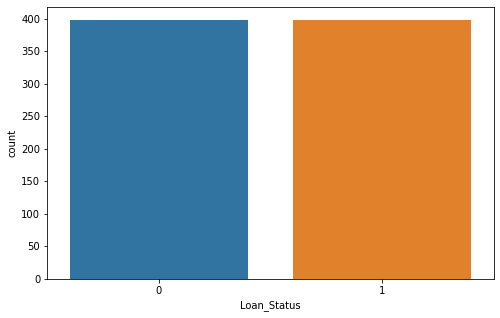

In [225]:
plt.figure(figsize=[8,5])
sns.countplot(y,)
plt.show()

## 1 Means ---Yes
## 0 Means --- NO

## Model learning phase-prediction phase-

So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target.
Here we are going to use classification models because our target column is catagorical in nature.

For classification model, Some matrix we are going to find like:

1) Accuracy_score

2) Classification report

3) Confusion matrix


### Models

1. Decision Tree classifier
2. KNeighbors classifier
3. Support vectod machine classifier
4. Random Forest classifier

### Bagging and Boosting

5. AdaBoost classifier
6. Gradient Boosting classifier
7. XGboost classifier
8. Naive bayes classifier

In [252]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import xgboost as xg

## Creating a function for finding Best random state

In [240]:
def model_select(model):
    max_score=0
    max_state=0
    
    for i in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        ac_score=accuracy_score(y_test,predict)
        if ac_score > max_score:
            max_score=ac_score
            max_state=i
    print("Max score is {} at random state {}".format(max_score,max_state))       

## Logistic regression

Finding best random state by calling model_select function

In [390]:
model_select(LogisticRegression)

Max score is 0.7897727272727273 at random state 68


In [391]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=68)

In [392]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7897727272727273
[[43 31]
 [ 6 96]]
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        74
           1       0.76      0.94      0.84       102

    accuracy                           0.79       176
   macro avg       0.82      0.76      0.77       176
weighted avg       0.81      0.79      0.78       176



In [393]:
for i in range(7,20):
    cvr=cross_val_score(lr,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.7160600616585713
Cross validation when cv= 8 --- 0.7059722222222222
Cross validation when cv= 9 --- 0.7084610146407899
Cross validation when cv= 10 --- 0.7059968354430379
Cross validation when cv= 11 --- 0.7084371108343711
Cross validation when cv= 12 --- 0.7097090306045529
Cross validation when cv= 13 --- 0.7072773868120247
Cross validation when cv= 14 --- 0.7060060866451844
Cross validation when cv= 15 --- 0.707221057535523
Cross validation when cv= 16 --- 0.7072448979591837
Cross validation when cv= 17 --- 0.7123034227567068
Cross validation when cv= 18 --- 0.7085858585858585
Cross validation when cv= 19 --- 0.7047802432911546


In [394]:
cvlr=7
Modellr=78.97
Cslr= 71.60
Diffrencelr= 78.97-71.60

### Kneighbors classifier

Finding best random state by calling model_select function

In [395]:
model_select(KNeighborsClassifier)

Max score is 0.8125 at random state 88


In [396]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=88)

In [397]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8125
[[78 22]
 [11 65]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       100
           1       0.75      0.86      0.80        76

    accuracy                           0.81       176
   macro avg       0.81      0.82      0.81       176
weighted avg       0.82      0.81      0.81       176



In [250]:
for i in range(7,20):
    cvr=cross_val_score(knn,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.7587663849890213
Cross validation when cv= 8 --- 0.7638131313131313
Cross validation when cv= 9 --- 0.7588241970264442
Cross validation when cv= 10 --- 0.7550316455696202
Cross validation when cv= 11 --- 0.7574546838245467
Cross validation when cv= 12 --- 0.7562000603045379
Cross validation when cv= 13 --- 0.7600170849774233
Cross validation when cv= 14 --- 0.760047440028643
Cross validation when cv= 15 --- 0.7624970882832519
Cross validation when cv= 16 --- 0.7587755102040816
Cross validation when cv= 17 --- 0.7588289709963542
Cross validation when cv= 18 --- 0.7625140291806959
Cross validation when cv= 19 --- 0.7600403447643501


In [251]:
cvknn=8
Modelknn= 81.25
Csknn= 76.38
Diffrenceknn= 81.25-76.38

### Naive bayes classifier

Finding best random state by calling model_select function

In [253]:
model_select(GaussianNB)

Max score is 0.7954545454545454 at random state 78


In [254]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=78)

In [255]:
mn=GaussianNB()
mn.fit(x_train,y_train)
pred=mn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7954545454545454
[[49 33]
 [ 3 91]]
              precision    recall  f1-score   support

           0       0.94      0.60      0.73        82
           1       0.73      0.97      0.83        94

    accuracy                           0.80       176
   macro avg       0.84      0.78      0.78       176
weighted avg       0.83      0.80      0.79       176



In [256]:
for i in range(7,20):
    cvr=cross_val_score(mn,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.7185885066648924
Cross validation when cv= 8 --- 0.7210858585858586
Cross validation when cv= 9 --- 0.7185903983656793
Cross validation when cv= 10 --- 0.7199050632911393
Cross validation when cv= 11 --- 0.7210979659609796
Cross validation when cv= 12 --- 0.7185851047791346
Cross validation when cv= 13 --- 0.7224708131635682
Cross validation when cv= 14 --- 0.7173737916219117
Cross validation when cv= 15 --- 0.72108082925693
Cross validation when cv= 16 --- 0.7198724489795918
Cross validation when cv= 17 --- 0.7198400174130706
Cross validation when cv= 18 --- 0.7212401795735129
Cross validation when cv= 19 --- 0.7173421358273733


In [257]:
cvgn=13
Modelgn= 79.54
Csgn= 72.24
Diffrencegn=79.54-72.24

### Decision tree classifier

Finding best random state by calling model_select function

In [258]:
model_select(DecisionTreeClassifier)

Max score is 0.8409090909090909 at random state 28


In [259]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=28)

In [260]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8636363636363636
[[80  9]
 [15 72]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.89      0.83      0.86        87

    accuracy                           0.86       176
   macro avg       0.87      0.86      0.86       176
weighted avg       0.87      0.86      0.86       176



In [263]:
for i in range(7,20):
    cvr=cross_val_score(dtc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.781577838401313
Cross validation when cv= 8 --- 0.7879545454545454
Cross validation when cv= 9 --- 0.80426455566905
Cross validation when cv= 10 --- 0.800490506329114
Cross validation when cv= 11 --- 0.8018368617683685
Cross validation when cv= 12 --- 0.7930235187697874
Cross validation when cv= 13 --- 0.7893666354798032
Cross validation when cv= 14 --- 0.78656462585034
Cross validation when cv= 15 --- 0.7789890519450269
Cross validation when cv= 16 --- 0.7817602040816327
Cross validation when cv= 17 --- 0.7829079828045927
Cross validation when cv= 18 --- 0.7755611672278337
Cross validation when cv= 19 --- 0.7776758970597225


In [264]:
cvdt=9
Modeldt= 86.36
Csdt=80.42
Diffrencedt= 89.36-80.42

### Support vector machine classifier

Finding best random state by calling model_select function

In [265]:
model_select(SVC)

Max score is 0.8068181818181818 at random state 68


In [266]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=68)

In [267]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8068181818181818
[[54 20]
 [14 88]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        74
           1       0.81      0.86      0.84       102

    accuracy                           0.81       176
   macro avg       0.80      0.80      0.80       176
weighted avg       0.81      0.81      0.81       176



In [268]:
for i in range(7,20):
    cvr=cross_val_score(svc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.7286801073480159
Cross validation when cv= 8 --- 0.7261868686868687
Cross validation when cv= 9 --- 0.7312592214277607
Cross validation when cv= 10 --- 0.7324525316455697
Cross validation when cv= 11 --- 0.7299363497993635
Cross validation when cv= 12 --- 0.7262550881953868
Cross validation when cv= 13 --- 0.7326201033234347
Cross validation when cv= 14 --- 0.7249597207303974
Cross validation when cv= 15 --- 0.7311670160726765
Cross validation when cv= 16 --- 0.7349744897959183
Cross validation when cv= 17 --- 0.7261794634597595
Cross validation when cv= 18 --- 0.733922558922559
Cross validation when cv= 19 --- 0.7286814597469282


In [269]:
cvsvm=16
Modelsvm=80.68
Cssvm=73.49
Diffrencesvm= 80.68-73.49

## Ensamble technique --

### Bagging and boosting

.

## Random forest classifier
Finding best random state by calling model_select function

In [584]:
model_select(RandomForestClassifier)

Max score is 0.9034090909090909 at random state 78


In [585]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=78)

In [586]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8693181818181818
[[71 11]
 [12 82]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.88      0.87      0.88        94

    accuracy                           0.87       176
   macro avg       0.87      0.87      0.87       176
weighted avg       0.87      0.87      0.87       176



In [587]:
for i in range(7,20):
    cvr=cross_val_score(rfc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.8393882937432074
Cross validation when cv= 8 --- 0.8420328282828282
Cross validation when cv= 9 --- 0.8434059698104641
Cross validation when cv= 10 --- 0.8495411392405062
Cross validation when cv= 11 --- 0.8484675522346755
Cross validation when cv= 12 --- 0.8484660033167494
Cross validation when cv= 13 --- 0.8534149615588007
Cross validation when cv= 14 --- 0.8457080200501252
Cross validation when cv= 15 --- 0.8518984393198229
Cross validation when cv= 16 --- 0.8470918367346938
Cross validation when cv= 17 --- 0.8432551559013985
Cross validation when cv= 18 --- 0.843658810325477
Cross validation when cv= 19 --- 0.8406381808178984


In [588]:
cvrf=13
Modelrf= 86.93
Csrf= 85.34
Diffrencerf =86.93-85.34

## AdaBoostClassifier
Finding best random state by calling model_select function

In [292]:
model_select(AdaBoostClassifier)

Max score is 0.8465909090909091 at random state 86


In [293]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=86)

In [294]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8465909090909091
[[59 17]
 [10 90]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.81        76
           1       0.84      0.90      0.87       100

    accuracy                           0.85       176
   macro avg       0.85      0.84      0.84       176
weighted avg       0.85      0.85      0.85       176



In [295]:
for i in range(7,20):
    cvr=cross_val_score(ada,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.7639674407257081
Cross validation when cv= 8 --- 0.7503156565656566
Cross validation when cv= 9 --- 0.7553342412892976
Cross validation when cv= 10 --- 0.7490506329113924
Cross validation when cv= 11 --- 0.7566936488169365
Cross validation when cv= 12 --- 0.7504334388662746
Cross validation when cv= 13 --- 0.759305210918114
Cross validation when cv= 14 --- 0.7551691729323309
Cross validation when cv= 15 --- 0.7551362683438154
Cross validation when cv= 16 --- 0.7528061224489796
Cross validation when cv= 17 --- 0.7653316645807259
Cross validation when cv= 18 --- 0.761952861952862
Cross validation when cv= 19 --- 0.750045846323125


In [297]:
cvada=17
Modelada = 84.65
Csada= 76.53
Diffrenceada=84.65-76.53

### GradientBoostingClassifier
Finding best random state by calling model_select function

In [298]:
model_select(GradientBoostingClassifier)

Max score is 0.8579545454545454 at random state 78


In [299]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=78)

In [300]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8579545454545454
[[68 14]
 [11 83]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        82
           1       0.86      0.88      0.87        94

    accuracy                           0.86       176
   macro avg       0.86      0.86      0.86       176
weighted avg       0.86      0.86      0.86       176



In [301]:
for i in range(7,20):
    cvr=cross_val_score(gbc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.8129837869008805
Cross validation when cv= 8 --- 0.8119444444444445
Cross validation when cv= 9 --- 0.8044631710362046
Cross validation when cv= 10 --- 0.8107120253164556
Cross validation when cv= 11 --- 0.8095682855956828
Cross validation when cv= 12 --- 0.8045567616463138
Cross validation when cv= 13 --- 0.8108652320709433
Cross validation when cv= 14 --- 0.8041308628714644
Cross validation when cv= 15 --- 0.8066620079198698
Cross validation when cv= 16 --- 0.8069642857142858
Cross validation when cv= 17 --- 0.8118300048974261
Cross validation when cv= 18 --- 0.8046576879910214
Cross validation when cv= 19 --- 0.8142001344825479


In [302]:
cvgbc=19
Modelgbc = 85.79
Csgbc= 81.42
Diffrencegbc =85.79-81.42

## Xg boost Classifier
Finding best random state by calling model_select function

In [374]:
model_select(xg.XGBClassifier)

Max score is 0.8863636363636364 at random state 68


In [376]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=68)

In [377]:
xb=xg.XGBClassifier()
xb.fit(x_train,y_train)
pred=xb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8863636363636364
[[63 11]
 [ 9 93]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        74
           1       0.89      0.91      0.90       102

    accuracy                           0.89       176
   macro avg       0.88      0.88      0.88       176
weighted avg       0.89      0.89      0.89       176



In [378]:
for i in range(7,14):
    cvr=cross_val_score(xb,x,y,cv=i)
    print("Cross validation when cv=",i,'---',cvr.mean())

Cross validation when cv= 7 --- 0.8166877370417193
Cross validation when cv= 8 --- 0.8194065656565657
Cross validation when cv= 9 --- 0.8258001361933947
Cross validation when cv= 10 --- 0.8244303797468355
Cross validation when cv= 11 --- 0.8307388958073889
Cross validation when cv= 12 --- 0.8208012965475652
Cross validation when cv= 13 --- 0.82705528210552


In [379]:
cvxg=11
Modelxg=88.63
Csxg=83.07
Diffrencexg=88.63-83.07

## Comparison of all the models

In [589]:
kk={'CV':[cvlr,cvknn,cvgn,cvdt,cvsvm,cvrf,cvada,cvgbc,cvxg],
                 'Model_accuracy':[Modellr,Modelknn,Modelgn,Modeldt,Modelsvm,Modelrf,Modelada,Modelgbc,Modelxg],
                 'Cross validation Score':[Cslr,Csknn,Csgn,Csdt,Cssvm,Csrf,Csada,Csgbc,Csxg],
 'Diffrence':[Diffrencelr,Diffrenceknn,Diffrencegn,Diffrencedt,Diffrencesvm,Diffrencerf,Diffrenceada,Diffrencegbc,Diffrencexg]
 }

In [590]:
result=pd.DataFrame(kk,index=['Logistic','kneighbour','GaussianNB','Decision tree',
                              'Support vector machine','Random forest','Adaboost','GredientBoosting','XGBoost'])

In [591]:
result

,CV,Model_accuracy,Cross validation Score,Diffrence
Logistic,7,78.97,71.60,7.37
kneighbour,8,81.25,76.38,4.87
GaussianNB,13,79.54,72.24,7.30
Decision tree,9,86.36,80.42,8.94
Support vector machine,16,80.68,73.49,7.19
Random forest,13,86.93,85.34,1.59
Adaboost,17,84.65,76.53,8.12
GredientBoosting,19,85.79,81.42,4.37
XGBoost,11,88.63,83.07,5.56


## Best Model
### We are chosing Random forest classifier as a best model, Because this model has least diffrence between model acuracy score and cross validation score and also its accuracy is highest as compare to others.That is why we are choosing RFC
### Model accuracy is : 86.93
### Cross_validation score : 85.34
### Diffrence : 1.59

.

## Hyper Parameter tuning
### Grid search cv

In [592]:
parameter={'n_estimators':[11,13,17,19],
           'criterion':['gini', 'entropy'],
           'max_depth':[30,35,40,45],
            'max_features':['sqrt', 'log2']
           }

In [593]:
GSC=GridSearchCV(rfc,parameter,cv=7)
GSC.fit(x_train,y_train)
GSC.best_params_

{'criterion': 'entropy',
 'max_depth': 35,
 'max_features': 'sqrt',
 'n_estimators': 13}

In [594]:
GSC_pred=GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.8977272727272727

In [595]:
GSC.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=35, n_estimators=13)

In [609]:
tune_rfc=RandomForestClassifier(criterion='entropy', max_depth=35, n_estimators=13)
tune_rfc.fit(x_train,y_train)
pred=tune_rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9090909090909091
[[71 11]
 [ 5 89]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        82
           1       0.89      0.95      0.92        94

    accuracy                           0.91       176
   macro avg       0.91      0.91      0.91       176
weighted avg       0.91      0.91      0.91       176



## We have done with Grid search CV and we got our best model Random forest classifier with 90.90 % accuracy.

# Accuracy-90.90%

In [613]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [614]:
y_pred_prob=GSC.best_estimator_.predict_proba(x_test)[:,-1]

In [615]:
y_pred_prob

array([1.        , 0.        , 0.61538462, 0.15384615, 0.84615385,
       0.92307692, 0.53846154, 0.        , 0.        , 0.07692308,
       0.76923077, 0.        , 0.84615385, 0.23076923, 0.84615385,
       0.07692308, 0.84615385, 0.        , 0.76923077, 0.46153846,
       0.07692308, 0.53846154, 0.        , 0.69230769, 0.        ,
       0.92307692, 0.61538462, 0.53846154, 0.53846154, 1.        ,
       0.38461538, 0.        , 0.69230769, 0.69230769, 0.07692308,
       0.61538462, 0.        , 0.61538462, 0.        , 0.76923077,
       0.38461538, 0.76923077, 0.84615385, 1.        , 0.92307692,
       0.30769231, 0.15384615, 0.69230769, 0.23076923, 0.76923077,
       0.69230769, 0.        , 0.30769231, 0.30769231, 0.69230769,
       0.76923077, 0.38461538, 0.07692308, 0.69230769, 0.69230769,
       0.76923077, 0.69230769, 0.15384615, 0.84615385, 0.15384615,
       0.69230769, 0.76923077, 0.        , 0.53846154, 0.07692308,
       0.53846154, 0.15384615, 0.15384615, 0.69230769, 0.     

In [616]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

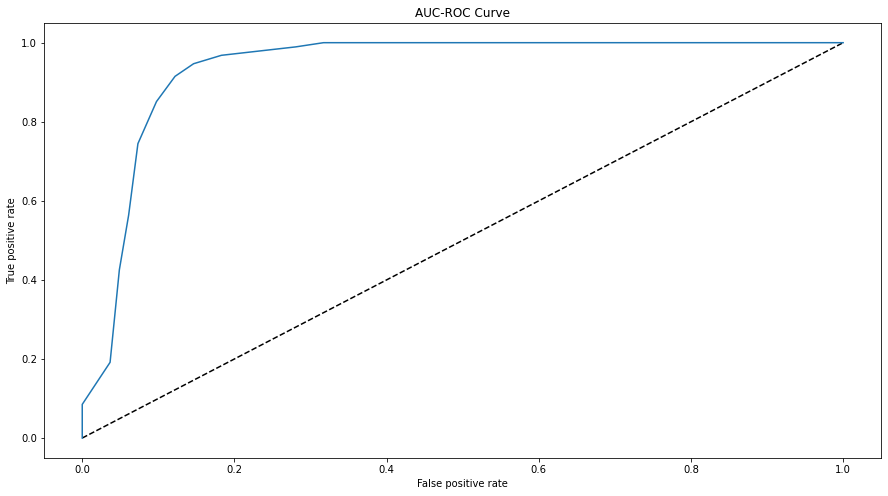

In [619]:
plt.figure(figsize=[15,8])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("AUC-ROC Curve")
plt.show()

In [620]:
auc_score=roc_auc_score(y_test,GSC.best_estimator_.predict(x_test))
print((auc_score))

0.8964711987545407


### AUC-ROC curve score is 89.64 %

### Saving the model

In [611]:
import joblib

In [621]:
joblib.dump(tune_rfc,"loan_status1.pkl ")

['loan_status1.pkl ']

### Prediction

In [626]:
model=joblib.load('loan_status1.pkl')

In [627]:
prediction=model.predict(x_test)

In [628]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predict','Original'])

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,175
Predict,1,0,0,0,1,1,1,0,0,0,...,1,1,1,0,0,0,1,1,1,0
Original,1,0,1,0,1,1,1,0,0,0,...,1,1,1,0,0,0,1,1,1,0


# Conclusion :

From the above observations we are concluding that

1) We had many null values in data set, So we used simple imputer technique to convert the null values into most frequent.

2) In order to replace the object data to the int values we used encoading technique.

3) In our data set Some skewness and outliers was present, To remove this we used zscore method for outliers removing and power transformation method for skewness removing.

4) For scaling the data set we used standard scaling technique.

5) Our data set was imbalanced, for balancing it SMOTE has been used.

We used many classifier for predicting -

like-

A) k nearest neighbour classifier
B) Naive bayes classifier(GaussianNB)
C) Design tree classifier
D) Support vector machine classifier 

6) In order to control overfitting and underfitting we adopted Cross validation.

7) For Bagging and boosting we have used Random forest classifier,Adaboost classifier, Xg boost classifier and Gradient boosting classifier.

8) We have plotted AUC-ROC curve to plot confusion matrix and the Score of AUC-ROC curve is 89.64 %.

9) We worked on Hyper parameter tuning on random forest classifier for boosting our model accuracy.

Finally we got Our best model Which is random forest classifier, it gave the 90.90 % accuracy. Which can be considered as good accuracy.

### Now our model is ready to predict.
## Accuracy- 90.90%
## Model- Random Forest Classifier